# Week 10 Jupyter Notebook - Clustering Part 1 

In [1]:
# Import libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Modeling
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Dimensionality reduction (for plotting clusters in 2D)
from sklearn.decomposition import PCA



# Load Dataset 

In [2]:
df = pd.read_csv('dataset_phishin.csv')
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

(None,
                                                  url  length_url  \
 0              http://www.crestonwood.com/router.php          37   
 1  http://shadetreetechnology.com/V4/validation/a...          77   
 2  https://support-appleld.com.secureupdate.duila...         126   
 3                                 http://rgipt.ac.in          18   
 4  http://www.iracing.com/tracks/gateway-motorspo...          55   
 
    length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
 0               19   0        3           0      0      0       0      0  ...   
 1               23   1        1           0      0      0       0      0  ...   
 2               50   1        4           1      0      1       2      0  ...   
 3               11   0        2           0      0      0       0      0  ...   
 4               15   0        2           2      0      0       0      0  ...   
 
    domain_in_title  domain_with_copyright  whois_registered_domain  \
 0          

In [3]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


# Pre Processing

In [4]:
# Load dataset
file_path = "dataset_phishin.csv"
df = pd.read_csv(file_path)

# Drop 'url' column 
df = df.drop(columns=['url'])

# Encode target variable: phishing = 1, legitimate = 0
df['status'] = df['status'].map({'phishing': 1, 'legitimate': 0})

# Separate features and target
X = df.drop(columns=['status'])
y = df['status']   

# Feature scaling with MinMaxScaler (K-Means relies on distance)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print("Preprocessing complete.")
print(f"Scaled feature matrix shape: {X_scaled.shape}")
print(f"Sample scaled data:\n{X_scaled[:5]}")


Preprocessing complete.
Scaled feature matrix shape: (11430, 87)
Sample scaled data:
[[1.53468386e-02 7.14285714e-02 0.00000000e+00 8.69565217e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.22580645e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.85714286e-02
  2.73972603e-02 6.66666667e-02 5.26315789e-02 7.50000000e-02
  1.08827086e-02 1.63934426e-01 7.23763571e-03 2.97029703e-02
  1.57894737e-01 1.80000000e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.64885168e-03 5.29411765e-01 4.70588235e-01 

# Elbow Method

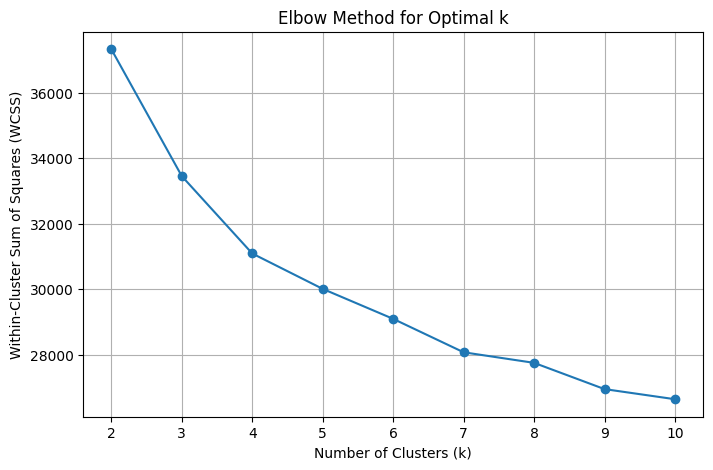

[37322.39932074354,
 33450.29940902029,
 31090.19053361064,
 30010.605610769817,
 29096.23136438713,
 28076.641928127003,
 27754.14178713893,
 26953.007578519373,
 26644.37672062198]

In [5]:
# K-Means Clustering Elbow Method

wcss = []  # Within Cluster Sum of Squares

# Test k values from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.grid(True)
plt.show()

wcss

# K-means Silhouette Score 

[0.1004270253802853,
 0.13196734904222243,
 0.12595701977416196,
 0.10615632065527075,
 0.10154196364867946,
 0.10810857233643913,
 0.09837868661862258,
 0.10139829535960843,
 0.10156858437490579]

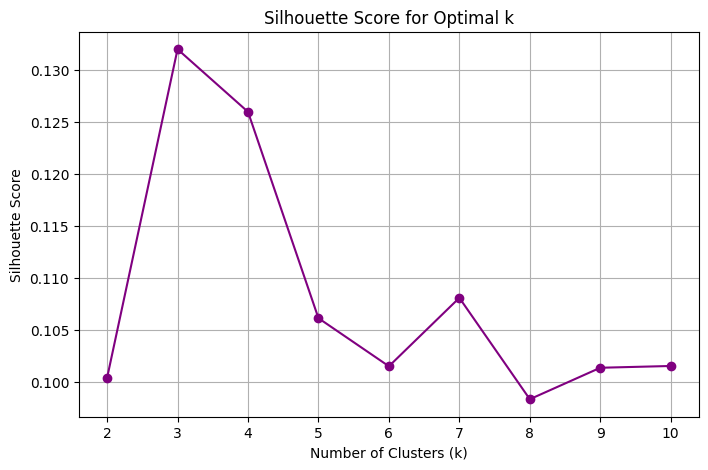

In [6]:
# K-Means Clustering Silhouette Score

silhouette_scores = []

# Test k values from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='purple')
plt.title("Silhouette Score for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show

silhouette_scores

In [7]:
# KMeans model using Euclidean distance and k=3
kmeans_final = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# Silhouette Score for the final model
final_silhouette = silhouette_score(X_scaled, cluster_labels)
print(f"Final Silhouette Score (k=3, Euclidean): {final_silhouette:.4f}")


Final Silhouette Score (k=3, Euclidean): 0.1320


# Visualization of Kmeans Clusters

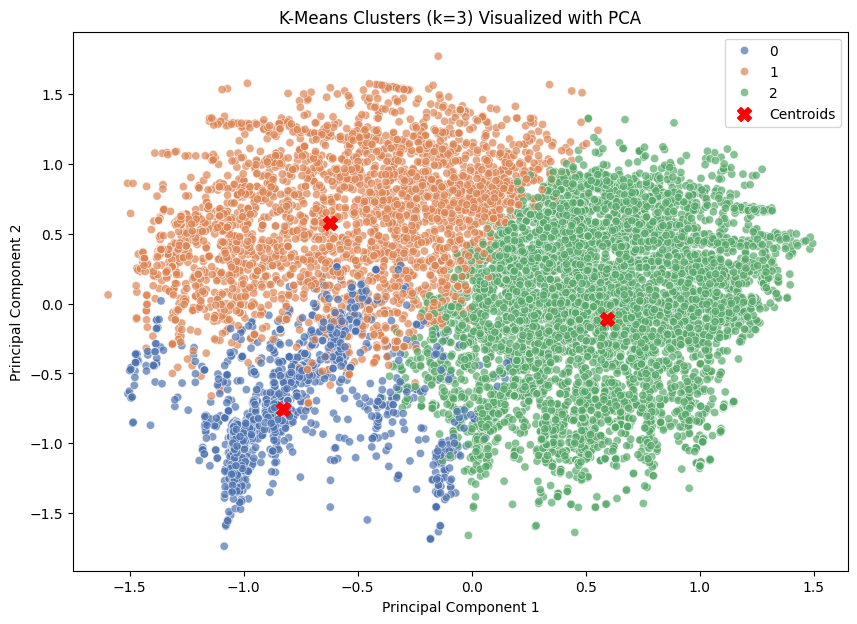

In [8]:
# Reduce data to 2 dimensions for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA components & cluster labels
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels  

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=pca_df, x='PC1', y='PC2',
    hue='Cluster', palette='deep', alpha=0.7
)

# Plot centroids in PCA space
centroids_pca = pca.transform(kmeans_final.cluster_centers_)
plt.scatter(
    centroids_pca[:, 0], centroids_pca[:, 1],
    s=100, c='red', marker='X', label='Centroids'
)

plt.title("K-Means Clusters (k=3) Visualized with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


Selected features for pairplot: ['length_url', 'length_hostname', 'ip', 'nb_dots']


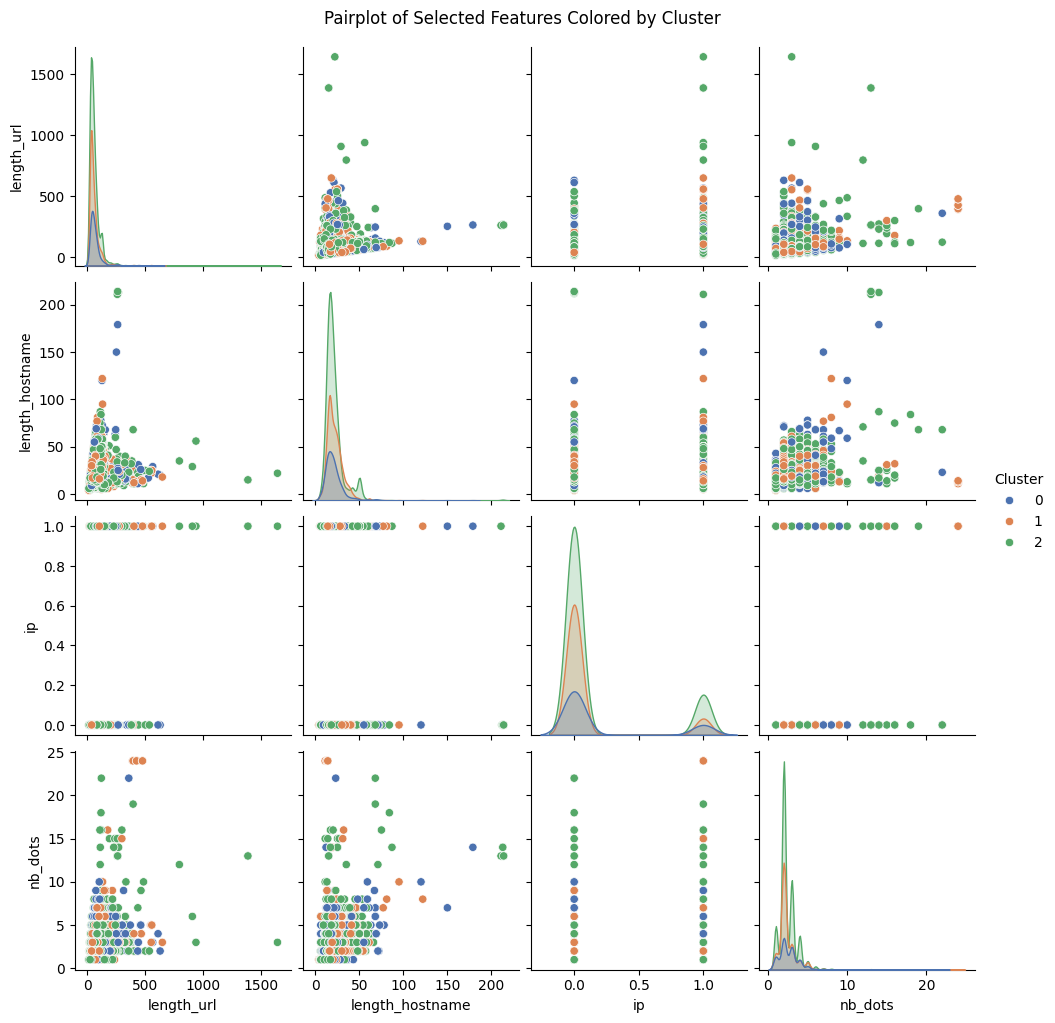

In [9]:
# first 4 numeric columns automatically
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
selected_features = numeric_cols[:4]  # first 4 numeric columns

print("Selected features for pairplot:", selected_features.tolist())

# Create a smaller DataFrame for pair plotting
pairplot_df = df[selected_features].copy()
pairplot_df['Cluster'] = cluster_labels  # add the cluster labels from KMeans

# Generate the pairplot
sns.pairplot(pairplot_df, hue='Cluster', palette='deep', diag_kind='kde')

# title
plt.suptitle("Pairplot of Selected Features Colored by Cluster", y=1.02)
plt.show()


In Week 10, I explored unsupervised learning by applying the K-Means clustering algorithm to the phishing dataset. Unlike the supervised models I used earlier, K-Means does not rely on labeled outcomes such as “phishing” or “legitimate.” Instead, it analyzes patterns in the data and groups similar points into clusters. To prepare the data, I removed the non-numeric url column, encoded the target variable for consistency, and scaled all features using MinMaxScaler. Scaling was essential because K-Means calculates distances between points, and unscaled features such as URL length would have dominated the clustering process and skewed the results.

To decide how many clusters to create, I used two common techniques: the Elbow Method and the Silhouette Score. The Elbow Method showed a clear “elbow” at k=3, where adding more clusters stopped significantly improving the model’s performance, while the Silhouette Score, which measures how clearly points fit into their assigned clusters, also peaked at k=3. Based on these findings, I finalized K-Means with three clusters. Since K-Means in scikit-learn uses Euclidean distance by default, that became the basis for how points were assigned to clusters. While other distance metrics like Manhattan or Cosine could have been explored using different algorithms, such as K-Medoids, Euclidean was appropriate for this project and kept the approach straightforward.

Once the final model ran with k=3, K-Means assigned every point to one of the three clusters (labeled 0, 1, or 2) and calculated centroids—the “center of gravity” of each cluster based on the averaged position of the points within it. To better understand and present the results, I created several visualizations: an Elbow plot and Silhouette Score plot to document why three clusters were chosen, a PCA scatterplot to project the high-dimensional dataset into two components and show the clusters in 2D space (with red X’s marking the centroids), and a pairplot using key features from prior models to show how clusters separated across those important dimensions.
